In [ ]:
%matplotlib inline


# Initialization for Mixtures of Gaussians

How to initialize Gaussian observation models.

We demonstrate a few possible initialization procedures for
Gaussian observation models (which include Gauss, DiagGauss, ZeroMeanGauss).

Initialization depends on two key user-specified procedures:

1) Specifying hyperparameters for the conjugate prior

2) Specifying how many clusters are created


In [1]:
# SPECIFY WHICH PLOT CREATED BY THIS SCRIPT IS THE THUMBNAIL IMAGE
# sphinx_gallery_thumbnail_number = 2

import bnpy
import numpy as np
import os

from matplotlib import pylab
import seaborn as sns

FIG_SIZE = (3, 3)
SMALL_FIG_SIZE = (2, 2)

Read bnpy's built-in "AsteriskK8" dataset from file.



In [2]:
dataset_path = os.path.join(bnpy.DATASET_PATH, 'AsteriskK8')
dataset = bnpy.data.XData.read_npz(
    os.path.join(dataset_path, 'x_dataset.npz'))

Make a simple plot of the raw data



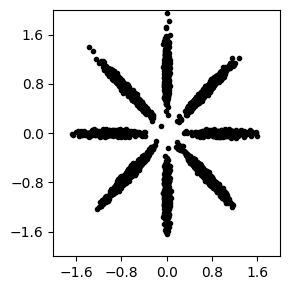

In [3]:
pylab.figure(figsize=FIG_SIZE)
pylab.plot(dataset.X[:, 0], dataset.X[:, 1], 'k.')
pylab.gca().set_xlim([-2, 2])
pylab.gca().set_ylim([-2, 2])
pylab.tight_layout()

Utility function for displaying many random initializations side by side.



In [4]:
def show_many_random_initial_models(
        obsPriorArgsDict,
        initArgsDict,
        nrows=1, ncols=6):
    ''' Create plot of many different random initializations
    '''
    fig_handle, ax_handle_list = pylab.subplots(
        figsize=(SMALL_FIG_SIZE[0] * ncols, SMALL_FIG_SIZE[1] * nrows),
        nrows=nrows, ncols=ncols, sharex=True, sharey=True)
    for trial_id in range(nrows * ncols):
        cur_model = bnpy.make_initialized_model(
            dataset,
            allocModelName='FiniteMixtureModel',
            obsModelName='Gauss',
            algName='VB',
            allocPriorArgsDict=dict(gamma=10.0),
            obsPriorArgsDict=obsPriorArgsDict,
            initArgsDict=initArgsDict,
            seed=int(trial_id),
            )
        # Plot the current model
        cur_ax_handle = ax_handle_list.flatten()[trial_id]
        bnpy.viz.PlotComps.plotCompsFromHModel(
            cur_model, Data=dataset, ax_handle=cur_ax_handle)
        cur_ax_handle.set_xticks([-2, -1, 0, 1, 2])
        cur_ax_handle.set_yticks([-2, -1, 0, 1, 2])
    pylab.tight_layout()

## initname: 'randexamples'
This procedure selects K examples uniformly at random.
Each cluster is then initialized from one selected example,
using a standard global step update. 

**Example 1**:
Initialize with 8 clusters, with prior biased towards small covariances

\begin{align}\E_{\mbox{prior}}[ \Sigma_k ] = 0.01 I_D\end{align}



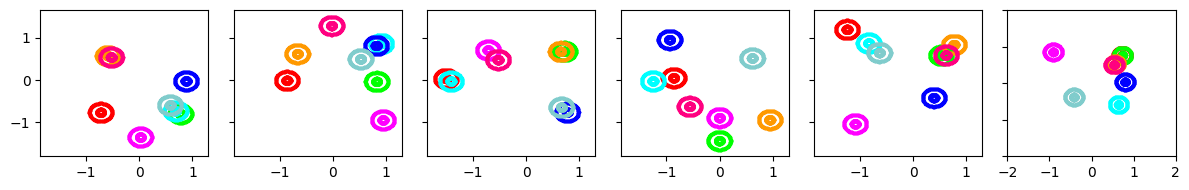

In [5]:
show_many_random_initial_models(
    dict(sF=0.01, ECovMat='eye'),
    dict(initname='randexamples', K=8))

**Example 2**:
Initialize with 8 clusters, with prior biased towards moderate covariances

\begin{align}\E_{\mbox{prior}}[ \Sigma_k ] = 0.2 I_D\end{align}



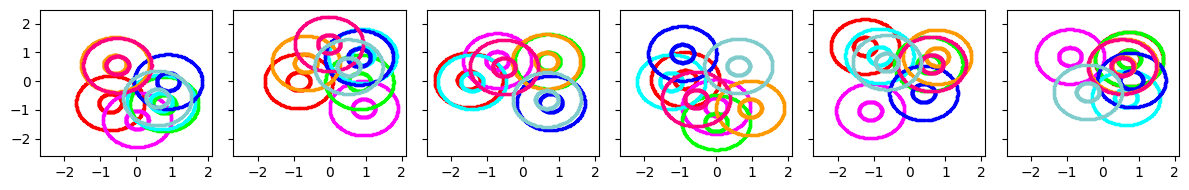

In [6]:
show_many_random_initial_models(
    dict(sF=0.2, ECovMat='eye'),
    dict(initname='randexamples', K=8))

## initname: 'bregmankmeans'
This procedure selects K examples using a distance-biased procedure.
First, one example is chosen uniformly at random.
Next, each successive example is chosen with probability proportional to the 
distance from the nearest example in the chosen set.

We measure distance using the appropriate Bregman divergence.

**Example 1**:
Initialize with 8 clusters, with prior biased towards small covariances



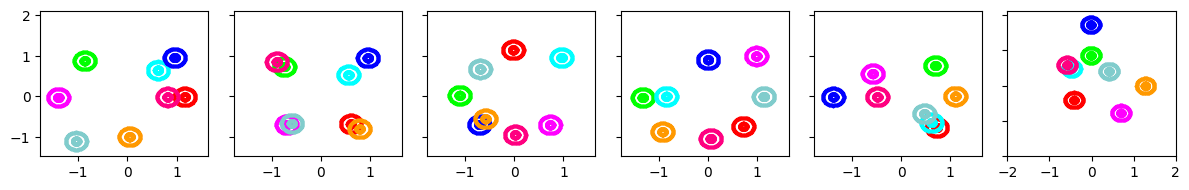

In [7]:
show_many_random_initial_models(
    dict(sF=0.01, ECovMat='eye'),
    dict(initname='bregmankmeans', K=8, init_NiterForBregmanKMeans=0))

**Example 2**:
Initialize as above, 
then allow the k-means algorithm to run for 10 iterations 
to "refine" the initial clustering.



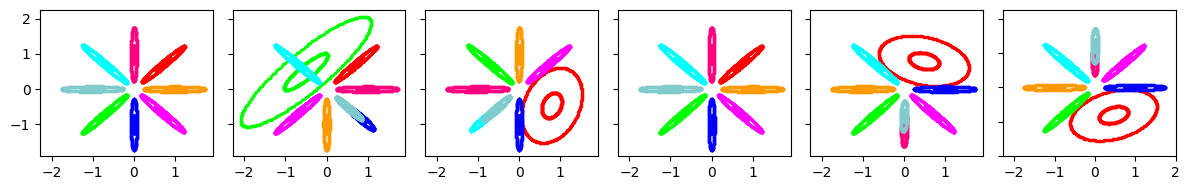

In [10]:
show_many_random_initial_models(
    dict(sF=0.01, ECovMat='eye'),
    dict(initname='bregmankmeans', K=8, init_NiterForBregmanKMeans=10))